# Spectrogram Filtering And Enhancement

## Project Proposal for SCC-5830 - Image Processing and Analysis

### Student
David Souza Rodrigues

### Abstract
The objective of this project is to remove noise and enhance the spectrograms generated from audio records of soundscapes provided by the Laboratory of Spatial Ecology and Conservantion (LEEC), located at the UNESP's campus of Rio Claro. The main processing tasks involved in this project, are image filtering followed by image enhancement of the spectrograms. The spectrograms are generated by applying a Fast Fourier transform (FFT) to the audios. These spectrograms are used in the field of bioacoustics and soundscape ecology to help characterize the soundscape and identify species present in the recordings. The output images of this project are spectrograms with reduced noise and enhanced events, presumably helping in species identification.

### Main objective

The objective of this project is to remove noise and enhance the spectrograms generated from audio records of soundscapes provided by the Laboratory of Spatial Ecology and Conservantion (LEEC), located at the UNESP's campus of Rio Claro.


### Description of the input images

The input images are grayscale images generated with the **generateImage.py** script from some of the audios provided by the Laboratory of Spatial Ecology and Conservantion (LEEC), located at the UNESP's campus of Rio Claro. The script applies a Fast Fourier Transform (FFT) to the audio signals through the *specgram* function of the *matplotlib* library. The source audios used are available at the **audios** folder. The images represent spectrograms of the 1 minute long audios. The x axis stands for time, while the y axis stands for frequency. The images are located at the **images** folder. The events of interest are, normally, the brighter sections of the picture, and their shape and frequency can be used to caracterize different sounds present in nature, such as bird calls. One use of spectrograms, is with audios obtained through Passive Acoustic Monitoring (PAM), to identify the presence of different species at the recording site.

In the examples bellow, it is shown a image generated from such audio files, as well as the information extracted and processed from the original tags that later will be used in the evaluation process. The values on the tags were normalized between 0 and 1 as to facilitate there use later.

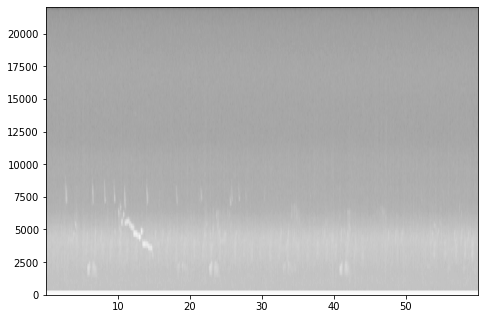

In [1]:
from generateImage import generateImage

filename = 'LEEC02__0__20161129_054600_ma'

tags = generateImage(filename)

In [2]:
tags

,startTime,endTime,startFrequency,endFrequency
0,0.165779,0.251216,0.095188,0.320313
1,0.044027,0.050031,0.317710,0.414930
2,0.062038,0.073122,0.177950,0.288195
3,0.095597,0.119766,0.049478,0.116317
4,0.562663,0.591912,0.181424,0.328993
5,0.885477,0.911647,0.101497,0.268163
6,0.822823,0.830982,0.191841,0.234376
7,0.966450,0.993236,0.109374,0.165800
8,0.009236,0.041564,0.144966,0.268231


### Steps
#### Image Filtering
The first step was to try different image filtering techniques to remove noise. After applying several techniques, some were discarded (Laplacian filter, Gaussian Laplacian filter, Prewitt filter, Sobel filter), some had visual differences (Filter In Frequency Domain) and some had no significant visual difference (Gaussian filter, Maximum filter, Minimum filter, Percentile filter, Rank filter, Uniform filter). The discarded filters were discarded due to the resulting image having even more noise than the original image.

In the examples bellow, on example of each was provided.

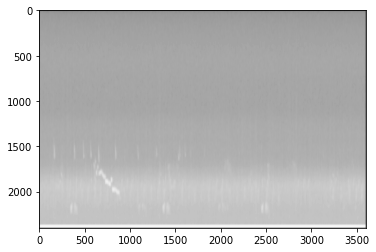

In [3]:
from filterImage import filterImage, Filters
from imageio.v3 import imread

image = imread(f'images/{filename}.png')[:,:,0]

filteredImage1 = filterImage(image, Filters.Gaussian)

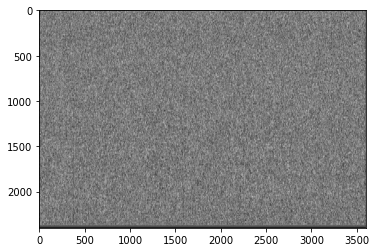

In [4]:
_ = filterImage(image,Filters.Laplacian)

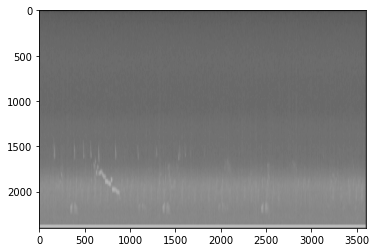

In [5]:
filteredImage2 = filterImage(image, Filters.FilterInFrequencyDomain)

#### Image Enhancement
The second step was to apply image enhancement techniques to try improving the perception of events of interest. Two techniques were applied, a logarithmic function and a histogram equalisation. Both were applied to the original image without filtering and to the filtered images.
The logarthmic function was not adequate to enhance the images, and has increased the saturation beyond that of the original image for all inputs images (original and filtered).
The histogram equalisation on the other hand, has improved the contrast of the image, with different levels depending on wheter the image was already filtered or not.

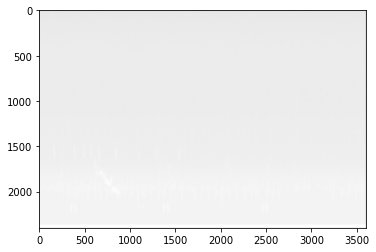

In [6]:
from enhanceImage import enhanceImage, EnhancementTechniques

result1 = enhanceImage(filteredImage1, EnhancementTechniques.Logarithmic)

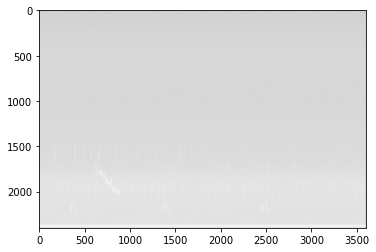

In [7]:
result2 = enhanceImage(filteredImage2, EnhancementTechniques.Logarithmic)

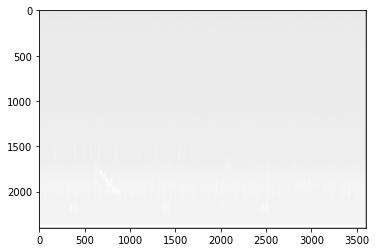

In [8]:
result3 = enhanceImage(image, EnhancementTechniques.Logarithmic)

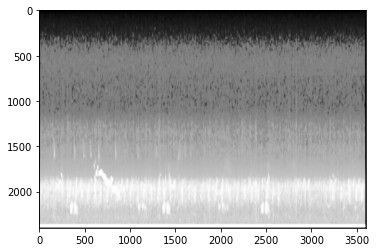

In [9]:
result4 = enhanceImage(filteredImage1, EnhancementTechniques.HistogramEqualisation)

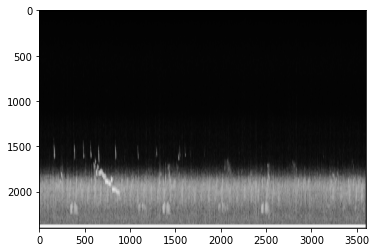

In [10]:
result5 = enhanceImage(filteredImage2, EnhancementTechniques.HistogramEqualisation)

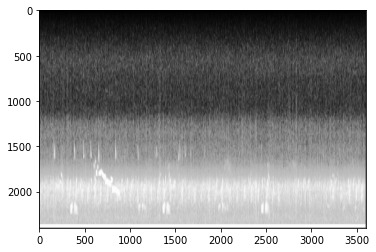

In [11]:
result6 = enhanceImage(image, EnhancementTechniques.HistogramEqualisation)

#### Evaluation
The final step was to evaluate if the images have been improved and if relevant data has been lost. The evalutaion was made visually, by verifing if the already known points of interest, described in the tags, are possible to identify. Ideally, the spectrograms would be reverted back to audio format, heard and compared with the original audios. However, there was not enough time to address this implementation.

In the examples bellow, first the original image's points of interest are shown, followed by the same points of interest of the enhanced images. Only the images enhanced by the histogram equalisation are shown. The ones, were the logarithmic function was applied, were not shown because there saturation was so high, that the images were almost completely white.

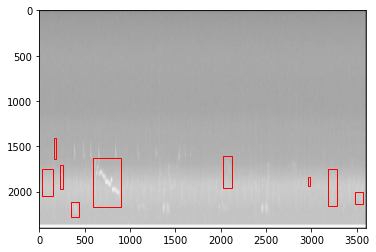

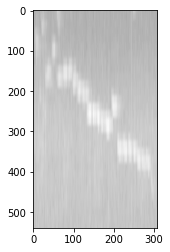

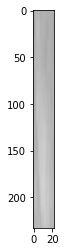

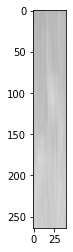

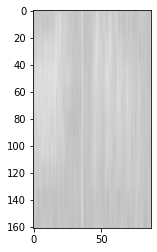

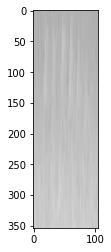

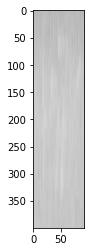

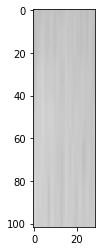

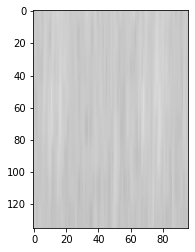

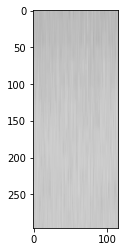

In [12]:
from evaluateImage import evaluateImage

evaluateImage(image,tags)

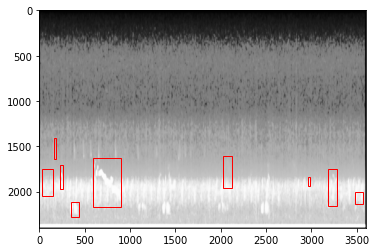

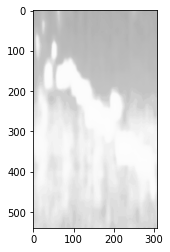

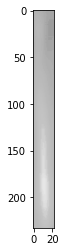

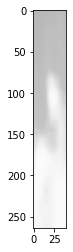

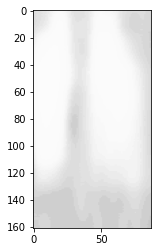

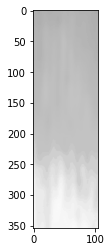

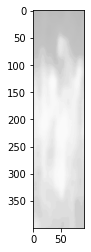

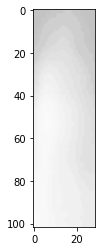

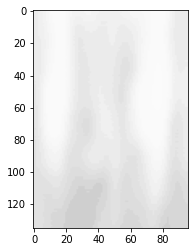

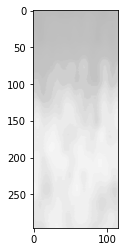

In [13]:
evaluateImage(result4,tags)

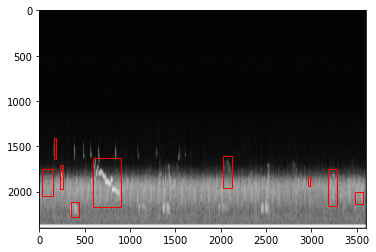

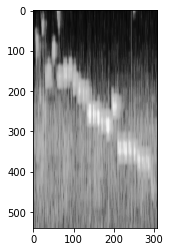

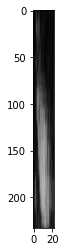

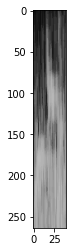

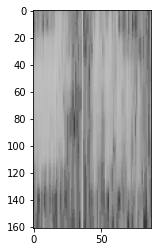

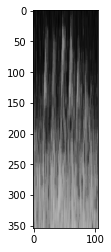

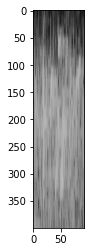

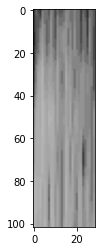

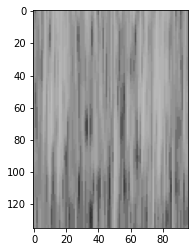

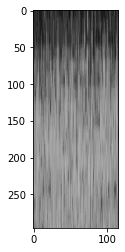

In [14]:
evaluateImage(result5,tags)

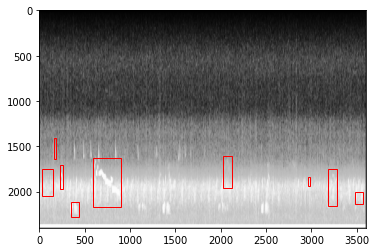

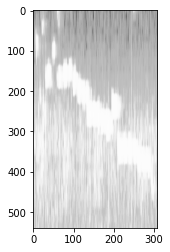

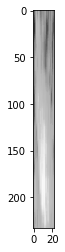

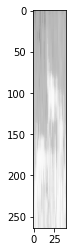

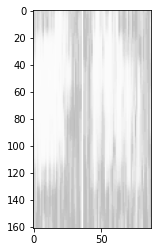

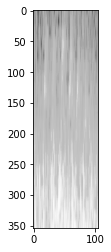

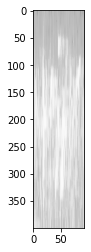

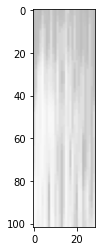

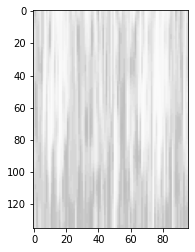

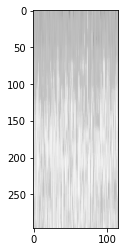

In [15]:
evaluateImage(result6,tags)

### Results
By analysing the results, some conclusions were drawn.  
First, not all filters are suited to this problem. Some even result in loss of most of the relevant information available.  
Second, enhancing the image by applying a logarithmic funtion proved futile, as it increased the saturation of the image and made it almost completely white.  
Third, the histogram equalisation shows pomise in enhancing the images. Although filtering the image first does not appear to have improved the overall result of the equalisation when compared with applying the equalisation to the original unfiltered image.  
Fourth, these analyses were limited to grayscale images, there results could have been different if the images were generated as coloured images.